In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import minimize_scalar

from numpy.linalg import inv, norm
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from itertools import chain
import random


np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

## Generate data

In [3]:
# params
p = 200
c = 10
n = c * p
sigma = 0.5
t = 10 # number of tasks

# covariates
X = np.random.randn(n, p)

# models
beta_0 = np.random.randn(p, 1) / math.sqrt(p)
r = 1

## Get HPS estimators

In [4]:
#args.print_every = 20
#args.epochs = 1000
#args.lr = 0.02
#two_layer_square_loss(data_train, data_test, args)

def get_HPS_estimator(X, Y):
    A_hat = Y.T @ X @ np.linalg.inv(X.T @ X) @ X.T @ Y
    U, D, V = np.linalg.svd(A_hat)
    U = U[:, :r]
    BA_hat = np.linalg.inv(X.T @ X) @ X.T @ Y @ U @ U.T
    
    return BA_hat

In [5]:
#print('B_star', B_star)

#print('U', U)

#print(BA_hat - B_star)

## Get prediction loss

In [6]:
def get_avg_pred_loss(BA_hat):
    err = np.linalg.norm(BA_hat - B_star, 'fro') ** 2
    return err / t

## Vary total sample size

In [7]:
d = 0.2
B_star = beta_0 @ np.ones((1, t)) + d * np.random.randn(p, t) / math.sqrt(p)
Y = X @ B_star + sigma * np.random.randn(n, t)

n_list = [i * p for i in range(2, c + 1)]
emp_avg_loss_list = []

stl_list = []

for i in n_list:
    X_i = X[:i, :]
    Y_i = Y[:i, :]
    
    print(X_i.shape, Y_i.shape)
    
    stl_list.append(sigma**2 * np.trace(np.linalg.inv(X_i.T @ X_i)))
    
    BA_hat = get_HPS_estimator(X_i, Y_i)
    avg_loss = get_avg_pred_loss(BA_hat)
    emp_avg_loss_list.append(avg_loss)

thm_avg_loss_list = [(1 - r / float(t)) * d**2 + (float(r) / t) * (sigma**2 * p) / (i - p) for i in n_list]

(400, 200) (400, 10)
(600, 200) (600, 10)
(800, 200) (800, 10)
(1000, 200) (1000, 10)
(1200, 200) (1200, 10)
(1400, 200) (1400, 10)
(1600, 200) (1600, 10)
(1800, 200) (1800, 10)
(2000, 200) (2000, 10)


In [8]:
print(n_list)
print(emp_avg_loss_list)
print(thm_avg_loss_list)

print(stl_list)
print('stl', sigma**2 * p / (n-p))

d2_emp_avg_loss_list = emp_avg_loss_list
d2_thm_avg_loss_list = thm_avg_loss_list

[400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
[0.06097580312778087, 0.050317823385724006, 0.045066959426342076, 0.043554132278083066, 0.04201525823626638, 0.04060978987557555, 0.04023891435345959, 0.03969786858979875, 0.039191787741846056]
[0.06100000000000001, 0.048500000000000015, 0.04433333333333334, 0.04225000000000001, 0.04100000000000001, 0.04016666666666668, 0.039571428571428584, 0.039125000000000014, 0.038777777777777786]
[0.25452568237621026, 0.12619721712871343, 0.08348620613422573, 0.062552325771388, 0.05001973634757232, 0.04176568433158476, 0.03575469940862358, 0.03127079016492476, 0.027812608965034367]
stl 0.027777777777777776


In [9]:
d1_emp_avg_loss_list = emp_avg_loss_list
d1_thm_avg_loss_list = thm_avg_loss_list

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


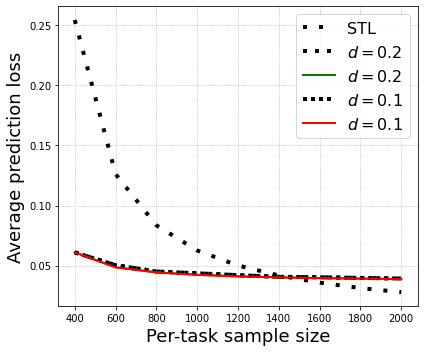

In [14]:
plt.figure(figsize=(6,5))

plt.plot(n_list, stl_list, linestyle='--', dashes=(1, 3),  c='k', lw=4, label='STL')

plt.plot(n_list, d2_emp_avg_loss_list, linestyle='--', dashes=(1, 2),  c='k', lw=4, label=r'$d = 0.2$')
plt.plot(n_list, d2_thm_avg_loss_list, c='g', lw=2, label=r'$d = 0.2$')

plt.plot(n_list, d1_emp_avg_loss_list, linestyle='--', dashes=(1, 1),  c='k', lw=4, label=r'$d = 0.1$')
plt.plot(n_list, d1_thm_avg_loss_list, c='r', lw=2, label=r'$d = 0.1$')



#plt.xticks(np.arange(400, 2400, 400), fontsize=14)
#plt.yticks(np.arange(0.02, 0.08, 0.02), fontsize=14)
#plt.xlim([0,6])

#plt.ylim([0.01, 0.075])

plt.xlabel('Per-task sample size', fontsize=18)
plt.ylabel('Average prediction loss', fontsize=18)
plt.grid(ls = ':', lw=0.8)
plt.legend(fontsize=16)
plt.tight_layout()
plt.savefig('same_covariates.eps')

## Plot the effect of source task data size

In [11]:
#1.0 - np.ndarray.flatten(np.array(cos_sim_list))

In [12]:
te_beta_t - np.array(te_mtl_list)

NameError: name 'te_beta_t' is not defined

In [ ]:
np.array(d_list)/sigma**2

In [ ]:
for a, b in zip(1000* np.array(provable_pos[0])/sigma**2, te_beta_t - np.array(provable_pos[1])):
    print(a, b)
print()

for a, b in zip(x_thy_neg, y_thy_neg):
    print(a, b)
print()

for a, b in zip(1000* np.array(unknown[0])/sigma**2, te_beta_t - np.array(unknown[1])):
    print(a, b)

In [ ]:
thy_neg = 1000* np.array(provable_neg[0])/sigma**2
print(thy_neg[:8])

In [ ]:
print(B_star)

In [ ]:
[0.036200516238370825, 0.0338041386386532, 0.03237846769917451, 0.0315425075478014, 0.03106043739695919, 0.030839254903264286, 0.03077688374697106, 0.030850093273344235, 0.031162991896567068, 0.031159971596691607, 0.031378247890921224, 0.03155231475436127, 0.03190086046063125, 0.032159217751299096, 0.03241576898581232, 0.032665833207184344]
[0.03619402, 0.03387497, 0.03250933, 0.03173627, 0.03134094, 0.03119067,
 0.03120112, 0.03131732, 0.03150278, 0.03173284, 0.03199069, 0.03226471,
 0.03254688, 0.03283162, 0.03311506, 0.03339454]